### Model Evaluation Overview

This notebook evaluates the performance of the trained CNN model
on unseen test data.  
It includes accuracy measurement, confusion matrix analysis,
and detailed classification metrics.



In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report


d:\WorkSpace\Python Works\TSR_CNN_Project\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### Load Trained Model

This section loads the saved CNN model that was trained earlier.
The model will be evaluated using the test dataset only.



In [4]:
MODEL_PATH = "../models/traffic_sign_mobilenet.keras"
model = load_model(MODEL_PATH)

print("Model loaded successfully")


Model loaded successfully


### Prepare Test Dataset

This section prepares the test data generator.
No data augmentation is applied since evaluation must reflect real performance.


In [5]:
DATA_DIR = "../data"
TEST_DIR = os.path.join(DATA_DIR, "Test")

IMG_SIZE = (96, 96)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 1288 images belonging to 85 classes.


### Test Accuracy Evaluation

This step evaluates the model accuracy and loss on the test dataset.
It provides an unbiased measure of model performance.


In [6]:
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 291ms/step - accuracy: 0.6856 - loss: 1.0917
Test Accuracy: 68.56%
Test Loss: 1.0917


### Generate Predictions

This section generates predictions for all test images.
These predictions are used to compute the confusion matrix
and classification metrics.


In [7]:
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step


### Confusion Matrix

The confusion matrix shows how well the model classifies each traffic sign.
Diagonal values represent correct predictions,
while off-diagonal values indicate misclassifications.


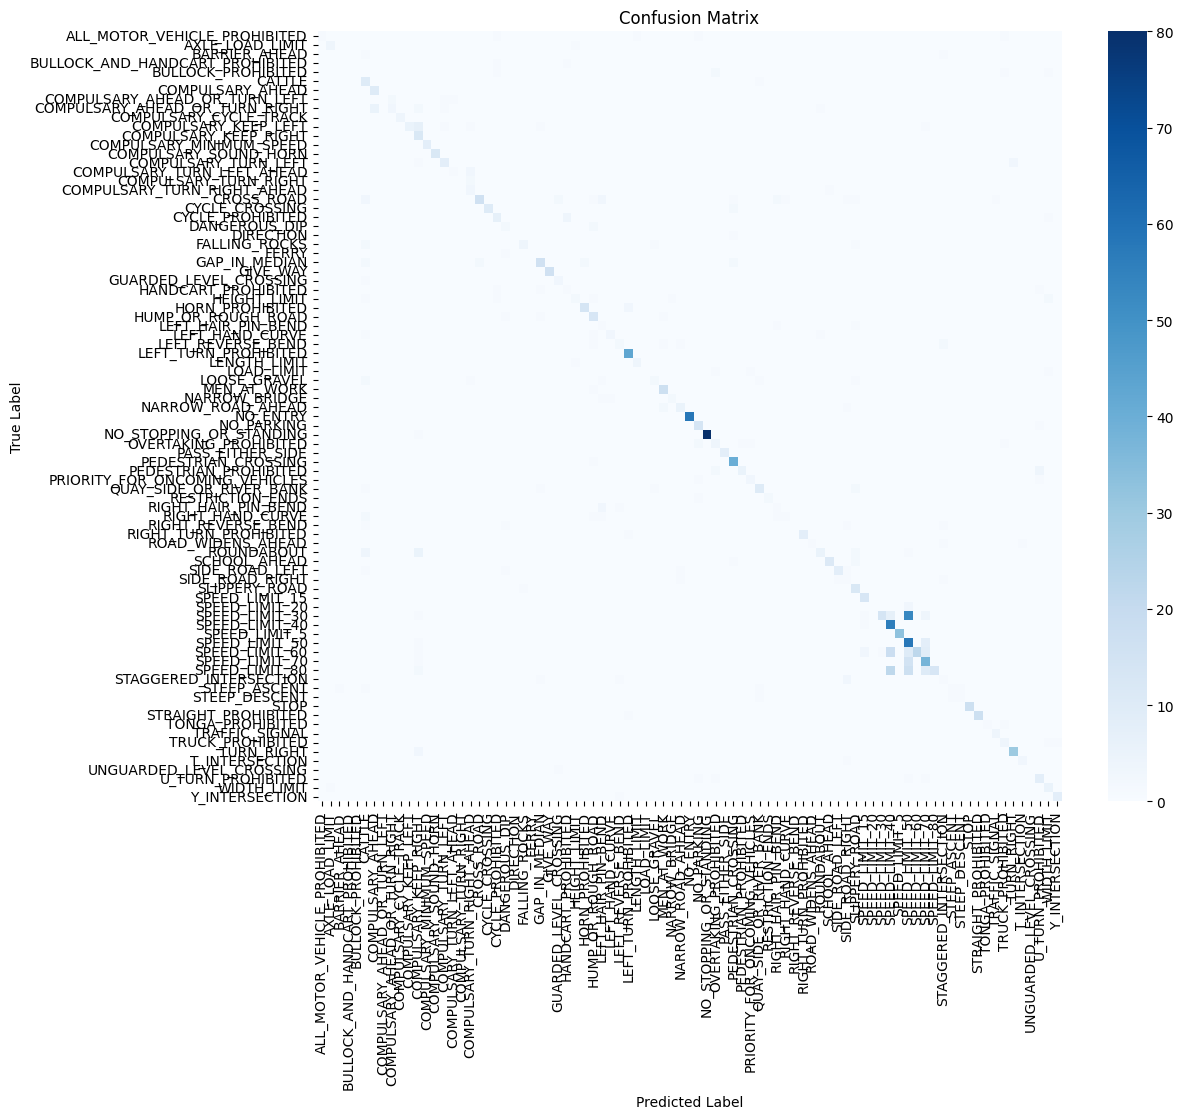

In [8]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues", xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Classification Report

This report provides precision, recall, and F1-score for each class.
It gives a detailed view of the model’s strengths and weaknesses.


In [9]:
print(classification_report(
    y_true,
    y_pred,
    target_names=test_data.class_indices.keys()
))


                                 precision    recall  f1-score   support

   ALL_MOTOR_VEHICLE_PROHIBITED       1.00      0.20      0.33         5
                AXLE_LOAD_LIMIT       0.80      0.80      0.80         5
                  BARRIER_AHEAD       0.00      0.00      0.00         2
BULLOCK_AND_HANDCART_PROHIBITED       0.00      0.00      0.00         2
             BULLOCK_PROHIBITED       0.00      0.00      0.00         5
                         CATTLE       0.30      0.91      0.45        11
               COMPULSARY_AHEAD       0.67      1.00      0.80        10
  COMPULSARY_AHEAD_OR_TURN_LEFT       0.00      0.00      0.00         4
 COMPULSARY_AHEAD_OR_TURN_RIGHT       0.60      0.25      0.35        12
         COMPULSARY_CYCLE_TRACK       1.00      1.00      1.00         4
           COMPULSARY_KEEP_LEFT       1.00      0.31      0.48        16
          COMPULSARY_KEEP_RIGHT       0.32      1.00      0.49        12
       COMPULSARY_MINIMUM_SPEED       1.00      1.

d:\WorkSpace\Python Works\TSR_CNN_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\WorkSpace\Python Works\TSR_CNN_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\WorkSpace\Python Works\TSR_CNN_Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri